In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df = pd.read_csv('C:/Everything/Data/Real-Data/real_Combine.csv')
x = df.iloc[:,:-1] #independent varible
y = df.iloc[:,-1] #dependent varible

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
2,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
3,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
4,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500


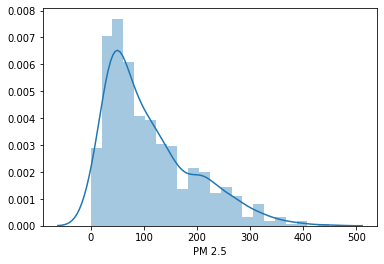

In [2]:
sns.distplot(y)

In [3]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [4]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.8600625813909455


In [9]:
score_dtree=cross_val_score(dtree,x,y,cv=5)
score_dtree.mean()

0.30143076792151674

In [10]:
pred_tree = dtree.predict(X_test)

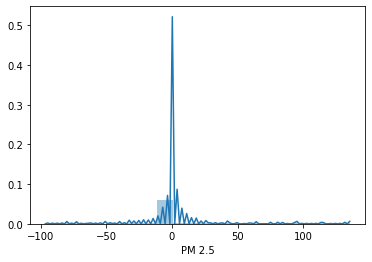

In [11]:
sns.distplot(y_test-pred_tree)

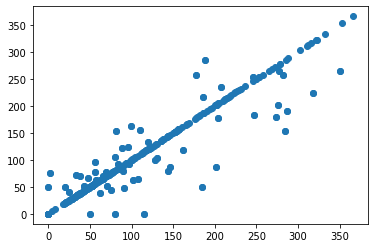

In [12]:
plt.scatter(y_test,pred_tree)

##### Hyperparameter Tuning Decision Tree Regressor

In [13]:
DecisionTreeRegressor()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [14]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [15]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [16]:
random_search.fit(x,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 5780 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 11156 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 18068 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 26516 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 36500 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 48020 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 61076 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 75668 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 91796 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  5.3min finished
C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,

In [17]:
random_search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [18]:
random_search.best_score_

-2631.683435611445

In [19]:
pred_hyp = random_search.predict(X_test)

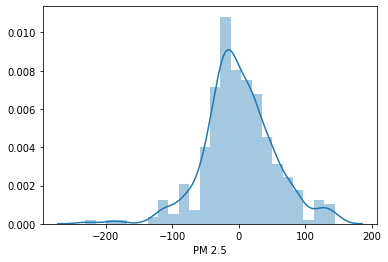

In [20]:
sns.distplot(y_test-pred_hyp)

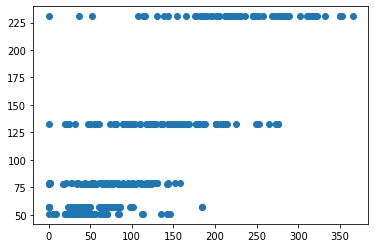

In [21]:
plt.scatter(y_test,pred_hyp)

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_hyp))
print('MSE:', metrics.mean_squared_error(y_test, pred_hyp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_hyp)))

MAE: 39.82987836593135
MSE: 2819.4788344027293
RMSE: 53.09876490468238


In [23]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)